# A Class for FreeSurface in UWGeodynamics

In [1]:
import underworld as uw
import UWGeodynamics as GEO
import glucifer

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
half_rate = 1.0 * u.centimeter / u.year
model_length = 400. * u.kilometer
bodyforce = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [4]:
Model = GEO.Model(elementRes=(128, 64), 
                  minCoord=(-200. * u.kilometer, 0. * u.kilometer), 
                  maxCoord=(200. * u.kilometer, 200. * u.kilometer), 
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

In [5]:
Model.outputDir="1_23_FreeSurface_Simple_Example"

In [6]:
uppercrust = Model.add_material(name="UppperCrust", shape=GEO.shapes.Layer2D(top=200.*u.kilometer, bottom=165.0 * u.kilometer))
mantleLithosphere = Model.add_material(name="MantleLithosphere", shape=GEO.shapes.Layer2D(top=uppercrust.bottom, bottom=100.0 * u.kilometer))
mantle = Model.add_material(name="Mantle", shape=GEO.shapes.Layer2D(top=mantleLithosphere.bottom, bottom=Model.bottom))

anomalyShape = GEO.shapes.Box(top=mantleLithosphere.bottom,
                              bottom=mantleLithosphere.bottom - 50. * u.kilometer,
                              minX = -50. * u.kilometer,
                              maxX = 50. * u.kilometer)

anomaly = Model.add_material(name="Anomaly", shape=anomalyShape)


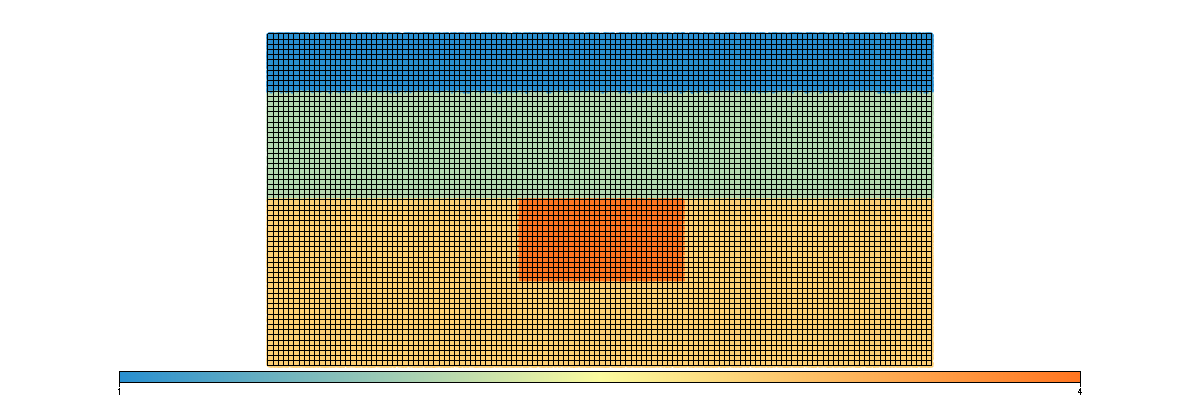

In [7]:
figdef = glucifer.Figure( figsize=(1200,400))
figdef.append(glucifer.objects.Points(Model.swarm,Model.materialField,pointSize=5.))
figdef.append(glucifer.objects.Mesh(Model.mesh))
figdef.save("Figure_1.png")
figdef.show()

In [8]:
uppercrust.density = 2700. * u.kilogram / u.metre**3
mantleLithosphere.density = 3300. * u.kilogram / u.metre**3
mantle.density = 3370. * u.kilogram / u.metre**3
anomaly.density = 1000. * u.kilogram / u.metre**3

In [9]:
uppercrust.viscosity = 1e23 * u.pascal * u.second
mantleLithosphere.viscosity = 1e22 * u.pascal * u.second
mantle.viscosity = 1e20 * u.pascal * u.second
anomaly.viscosity = 1e23 * u.pascal * u.second

In [10]:
Model.set_velocityBCs(left=(0., None), 
                      right=(0., None),
                      bottom=(None,0.),
                      top=(None, None))

In [11]:
Model.freeSurface = True

In [12]:
Model.solver.set_inner_method("mumps")

In [ ]:
Model.run_for(nstep=10, checkpoint_interval=5000.*u.year)


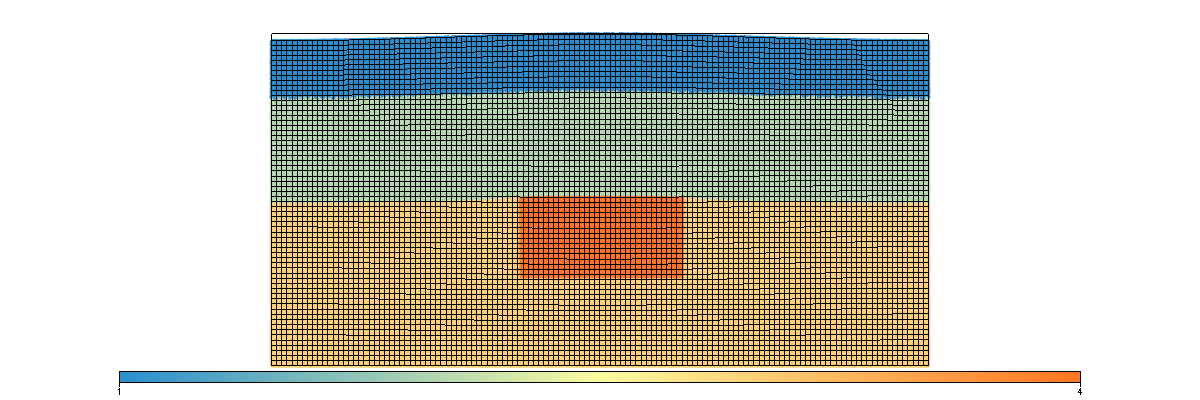

In [15]:
figdef.save("Figure_2.png")
figdef.show()